# Soft Margin SVM

Hard-margin SVMs have two main problems:
1. It only works when the data is **linearly separable**
2. It is very sensitive to **outliers**

The following figure shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin, and on the right the decision boundary ends up very different from the optimal solution, and it will probably not generalize as well. 

![alt text](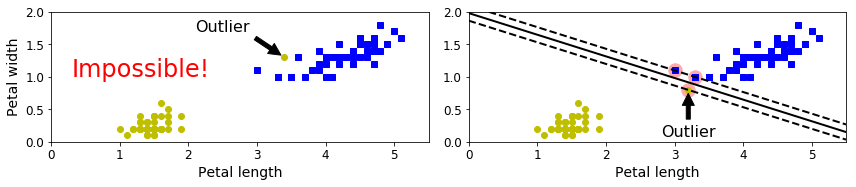%0A)

To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations. Doing This using *scikit-learn* is very easy!
In the following cell, complete the pipeline appropriately and then execute the cell.

In [0]:
from matplotlib import pyplot as plt
import numpy as np

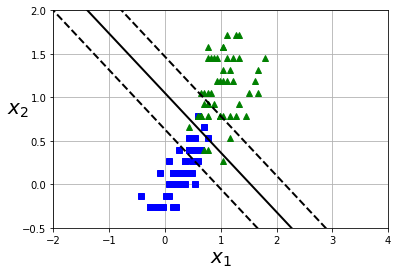

In [18]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

# COMPLETE THE PIPELINE
svm_clf = Pipeline([
        ("scaler", StandardScaler())
])

svm_clf.fit(X, y)

plot_dataset(svm_clf[0].transform(X), y, [-2, 4, -0.5, 2])
plot_svm_decision_boundary(svm_clf[1], -5, 10)

Experiment with the C argument below(explore large numbers as well) when constructing the *LinearSVC*, and see what happens. 

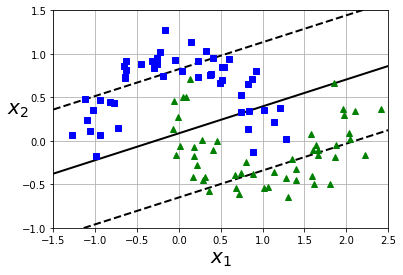

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

svclassifier = LinearSVC(C=1)
svclassifier.fit(X, y)
plot_svm_decision_boundary(svclassifier, -1.5, 2.5)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# Non-Linear SVMs

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features.

Execute the following cell and observe the result. This dataset comprises of two classes(blue and green in the diagram). As you can see, these two classes are by no means linearly seperable.

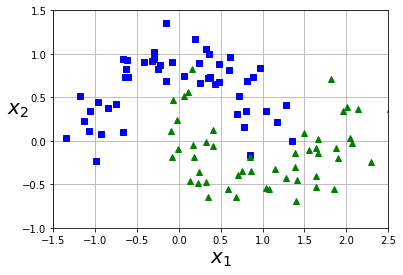

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.19, random_state=42)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# COMPLETE THE PIPELINE
polynomial_svm_clf = Pipeline([
        # ... add polynomial feature generator here 
        ("scaler", StandardScaler()),
        # ... add the svm here
])

# FIT THE MODEL HERE

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


''

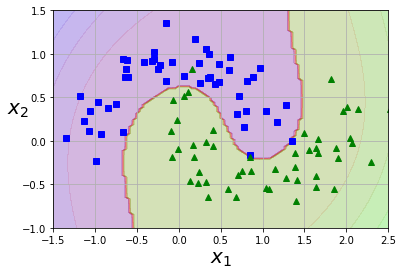

In [0]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Try the above code with higher *C*s, like 100 or above, and higher *degrees*, like 10 or above. analyze the results.

Considering that the original distribution is that of *two mooons*, Are the results better or worse ? 